# Workshop #6: Hypothesis Testing

In [1]:
#importing libraries
import numpy as np
import sympy as sy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

np.random.seed(123)

## Problem 1
Gulf Real Estate Properties Inc. is a real estate firm located in southwest Florida. The company, which advertises itself as “expert in the real estate market,” monitors condominium sales by collecting data on location, list price, sale price, and number of days it takes to sell each unit. Each condominium is classified as Yes for Gulf view if it is located directly on the Gulf of Mexico or No for Gulf view if it is located on the bay or a golf course, near but not on the Gulf. Sample data from the Multiple Listing Service in Naples, Florida, provided recent sales data for some condominiums. The prices are in thousands of dollars. The data are given in condominiums.csv. <br /><br /> 
Construct a 95% confidence interval estimate of the population mean Sale Price for condominiums with Gulf view, and then the 95% confidence interval for the population mean Sale Price for condominiums without Gulf view. Based on your results, does it seem that the prices differ?

In [2]:
# Load the data
df = pd.read_csv('condominiums.csv')
df.head()

,gulf_view,list_price,sale_price,days_to_sell
0,yes,495.0,475.0,130
1,yes,379.0,350.0,71
2,yes,529.0,519.0,85
3,yes,552.5,534.5,95
4,yes,334.9,334.9,119


In [3]:
df.shape

(58, 4)

In [4]:
df_withView = df[df['gulf_view'] == 'yes']
df_withoutView = df[df['gulf_view'] == 'no']
df_withView.head(), df_withoutView.head()

(  gulf_view  list_price  sale_price  days_to_sell
 0       yes       495.0       475.0           130
 1       yes       379.0       350.0            71
 2       yes       529.0       519.0            85
 3       yes       552.5       534.5            95
 4       yes       334.9       334.9           119,
    gulf_view  list_price  sale_price  days_to_sell
 40        no       217.0       217.0           182
 41        no       148.0       135.5           338
 42        no       186.5       179.0           122
 43        no       239.0       230.0           150
 44        no       279.0       267.5           169)

In [5]:
#sample1, sample2

sample1 = df_withView['sale_price']
sample2 = df_withoutView['sale_price']

n1 = sample1.size
n2 = sample2.size

T1 = stats.t(df = n1-1)
T2 = stats.t(df = n2-1)

x_bar1 = sample1.mean()
x_bar2 = sample2.mean()

se1 = sample1.std()/np.sqrt(n1)
se2 = sample2.std()/np.sqrt(n2)
 
t1_star_95 = T1.ppf((1+0.95)/2)
t2_star_95 = T2.ppf((1+0.95)/2)

l1_95 = x_bar1 - t1_star_95*se1
u1_95 = x_bar1 + t1_star_95*se1

l2_95 = x_bar2 - t2_star_95*se2
u2_95 = x_bar2 + t2_star_95*se2

print(f'With View: ({l1_95}, {u1_95})')
print(f'Without View: ({l2_95}, {u2_95})')

print("Comment: It's much cheaper to buy a condo without a view of the Gulf.")

With View: (392.6523357042181, 515.792664295782)
Without View: (181.36204825516631, 225.01572952261148)
Comment: It's much cheaper to buy a condo without a view of the Gulf.


## Problem 2
Triphammer Road is a busy street that passes through a residential neighborhood. Residents there are concerned that vehicles traveling on Triphammer often exceed the posted speed limit of 30 miles per hour. The local police sometimes place a radar speed detector by the side of the road; as a vehicle approaches, this detector displays the vehicle’s speed to its driver. The local residents are not convinced that such a passive method is helping the problem. They wish to persuade the village to add extra police patrols to encourage drivers to observe the speed limit. To help their case, a resident stood where he could see the detector and recorded the speed of vehicles passing it during a 15-minute period one day. When clusters of vehicles went by, he noted only the speed of the front vehicle. The data are given in triphammer.csv. <br /> <br /> 
Is there sufficient evidence to support the residents' concern about the speed of vehicles passing on Triphammer Road? State the hypotheses of the test, and then perform the correct test to reach a conclusion.

In [6]:
# Load the data
df = pd.read_csv('triphammer.csv')
df.head()

,vehicle type,speed (mph)
0,car,29
1,SUV,34
2,truck,34
3,truck,28
4,truck,30


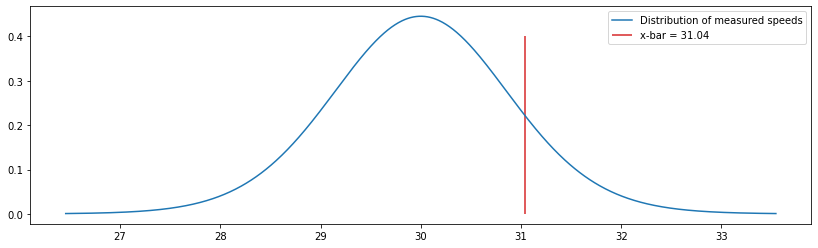

p-value =  0.12566910367402262
Do not reject H0 - we do not have sufficient data showing that the vehicles are driving over the set speed limit.


In [7]:
# the sample
sample = df['speed (mph)']

# hypotheses
# H0: mu = 30 <--- speed limit
# Ha: mu > 30   <--- residents suspect that vehicles are driving faster
mu0 = 30

# Get the statistics
n = sample.size
x_bar = sample.mean()
se = stats.sem(sample)

# Assuming H0 is true, this is the distribution of the averages of the heights for samples of size n
T = stats.t(df=n-1, loc = mu0, scale = se)

# Let us plot all the facts together
xs = np.linspace(mu0 - 4*se, mu0+4*se, 1000)
plt.figure(figsize=(14, 4))
plt.vlines(x_bar, 0, 0.4, color='tab:red', label=f'x-bar = {np.round(x_bar,2)}')
plt.plot(xs, T.pdf(xs), label='Distribution of measured speeds')
plt.legend()
plt.show()


# Calculate the p-value: (x_bar, +infty)
p = 1- T.cdf(x_bar) 
print('p-value = ', p)

 #Print a simple conclusion:
if p < 0.05:
    print('Reject H0 in favor of Ha. Vehicles are driving faster than the set speed limit.')
else:
    print("Do not reject H0 - we do not have sufficient data showing that the vehicles are driving over the set speed limit.")

## Problem 3
In an investigation of environmental causes of disease, data were collected on the annual mortality rate (deaths per 100,000) for males in 61 large towns in England and Wales. In addition, the water hardness was recorded as the calcium concentration (parts per million, ppm) in the drinking water. The data set (given in mortality_rates.csv) also notes, for each town, whether it was south or north of Derby. <br /> <br /> 
Perform an appropriate hypothesis test to establish if there is a significant difference in mortality rates in the two regions?

In [12]:
# Load the data
df = pd.read_csv('mortality_rates.csv')
df.head()

,derby,mortality,calcium
0,South,1702,44
1,South,1309,59
2,South,1259,133
3,North,1427,27
4,North,1724,6


In [13]:
df_South = df[df['derby'] == 'South']
df_North = df[df['derby'] == 'North']
df_South.head(), df_North.head()

(   derby  mortality  calcium
 0  South       1702       44
 1  South       1309       59
 2  South       1259      133
 5  South       1175      107
 6  South       1486        5,
     derby  mortality  calcium
 3   North       1427       27
 4   North       1724        6
 8   North       1696        6
 10  North       1711       13
 11  North       1444       14)

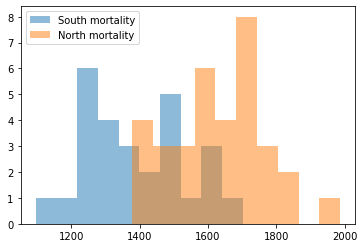

p value is  1.5756084682274963e-08
we reject the H0 - there is a significant difference in mortality rates between South and North


In [15]:
sample1 = df_South['mortality']
sample2 = df_North['mortality']

# hypotheses
# H0: mu_South = mu_North   <--- no significant difference in mortality rates between South and North
# Ha: mu_South != mu_North   <--- significant difference in mortality rate between South and North

plt.plot()
plt.hist(sample1, alpha = 0.5, label = "South mortality")
plt.hist(sample2, alpha = 0.5, label = "North mortality")
plt.legend()
plt.show()
t_stat, p_2 = stats.ttest_ind(sample1, sample2, equal_var = False)  #, alternative="greater"; for higher version of scipy (1.6 or greater)
print("p value is ", p_2/2)
if p_2/2 < 0.5: 
  print("we reject the H0 - there is a significant difference in mortality rates between South and North")
else:
  print("we do not have sufficient data to reject the H0 - no significant difference in mortality rates between South and North")

## Problem 4
A hygiene scientist decided to investigate just how effective washing with soap is in eliminating bacteria. To do this she tested four different methods—washing with water only, washing with regular soap, washing with antibacterial soap (ABS), and spraying hands with antibacterial spray (AS) (containing 65% ethanol as an active ingredient). She suspected that the number of bacteria on her hands before washing might vary considerably from day to day. To help even out the effects of those changes, she generated random numbers to determine the order of the four treatments. Each morning she washed her hands according to the treatment randomly chosen. Then she placed her right hand on a sterile media plate designed to encourage bacteria growth. She incubated each plate for 2 days at 36 °C after which she counted the bacteria colonies. She replicated this procedure 8 times for each of the four treatments. The data are given in bacterial_counts.csv. <br /> <br /> 
Is there evidence that the average bacterial counts are different for the four methods she tested?

In [23]:
# Load the data
df = pd.read_csv('bacterial_counts.csv')
df.head()

,method,bacterial_count
0,water,74
1,soap,84
2,antibacterial soap,70
3,alcohol spray,51
4,water,135


In [24]:
df['method'].unique()

array(['water', 'soap', 'antibacterial soap', 'alcohol spray'],
      dtype=object)

In [28]:
water = df[df['method'] == 'water']['bacterial_count']
soap = df[df['method'] == 'soap']['bacterial_count']
antibacterial = df[df['method'] == 'antibacterial soap']['bacterial_count']
alcohol = df[df['method'] == 'alcohol spray']['bacterial_count']

In [37]:
#create a single dataframe of the data
df = pd.DataFrame({'bacterial_count': np.concatenate([water, soap, antibacterial, alcohol]),
                   'method': np.repeat(['water', 'soap', 'antibacterial soap', 'alcohol spray'], repeats=8 )})

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df['bacterial_count'],
                          groups=df['method'],
                          alpha=0.05)

#display results

#display(df)
print(tukey)
print("Comment: Average bacterial counts are different for the following pairs: alcohol spray & antibacterial soap, alcohol spray & soap, alcohol spray & water."
      "For other pairs we cannot say as there is not enough data.")

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
      group1             group2       meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------
     alcohol spray antibacterial soap     55.0  0.032   3.7359 106.2641   True
     alcohol spray               soap     68.5 0.0056  17.2359 119.7641   True
     alcohol spray              water     79.5 0.0012  28.2359 130.7641   True
antibacterial soap               soap     13.5 0.8836 -37.7641  64.7641  False
antibacterial soap              water     24.5 0.5612 -26.7641  75.7641  False
              soap              water     11.0    0.9 -40.2641  62.2641  False
------------------------------------------------------------------------------
Comment: Average bacterial counts are different for the following pairs: alcohol spray & antibacterial soap, alcohol spray & soap, alcohol spray & water.For other pairs we cannot say as there is not enough data

## Problem 5
In July 1991, and again in April 2001, the Gallup Poll asked random samples of adults about their opinions on working parents. The given in working_parents.csv contains responses to the question “Considering the needs of both parents and children, which of the following do you see as the ideal family in today’s society?” <br /> <br /> 
Based on these data, is there evidence that there was a change in people’s attitudes during the 10 years between these polls? (in other words, are the responses in 1991 and 2001 independent)

In [38]:
# Load the data
df = pd.read_csv('working_parents.csv')
df.head()

,ideal_arrangement,year
0,both_work_full_time,1991
1,both_work_full_time,1991
2,both_work_full_time,1991
3,both_work_full_time,1991
4,both_work_full_time,1991


In [39]:
#contingency table
obs_data = pd.crosstab(df['ideal_arrangement'], df['year'])
display(obs_data)

year,1991,2001
ideal_arrangement,,
both_work_full_time,142,131
no_opinion,51,51
"one_works,other_stays_home_for_kids",396,416
"one_works,other_works_at_home",152,173
"one_works_full_time,other_part_time",274,244


In [42]:
#Hypotheses
#H0: there was a change in people’s attitudes during the 10 years between these polls - responses are independent 
#Ha: there was no change in people’s attitudes during the 10 years between these polls - responses are not independent 

#Running the chi-square test 

chi_sq_stat, p, df, exp_data = stats.chi2_contingency(obs_data)
print('chi_sq = ', chi_sq_stat)
print('p-value = ', p)
print('expected data:')
display(exp_data)

if p > 0.05:
    print('Based on the data, there is no evidence that the responses are not independent')
else:
    print('Based on the data, there is evidence that the responses are not independent')

chi_sq =  4.030209095036681
p-value =  0.4019329311784825
expected data:


array([[136.5, 136.5],
       [ 51. ,  51. ],
       [406. , 406. ],
       [162.5, 162.5],
       [259. , 259. ]])

Based on the data, there is no evidence that the responses are not independent
